# Load dff and events from desginated paths
- Passing dff and events directory paths to ExperimentGroup and BehaviorOphysExperimentDev

In [1]:
import numpy as np
np.set_printoptions(precision=5, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib.cm as cm
    
import seaborn as sns
from pathlib import Path
import os, sys, time, scipy
from importlib import reload

from brain_observatory_analysis.ophys.experiment_group import ExperimentGroup
from brain_observatory_analysis.ophys.stimulus_response import get_mean_stimulus_response_expt_group
from brain_observatory_analysis.ophys.experiment_loading import start_gh_analysis, start_lamf_analysis, start_vb_analysis

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache as bpc
from brain_observatory_qc.data_access.behavior_ophys_experiment_dev import \
     BehaviorOphysExperimentDev
from brain_observatory_qc.data_access import behavior_ophys_experiment_dev as boe_dev
from mindscope_utilities.visual_behavior_ophys import data_formatting
from brain_observatory_qc.data_access import from_lims

from brain_observatory_analysis.ophys import correlation_analysis as ca
from brain_observatory_analysis.ophys import raster_plot as rp
from brain_observatory_analysis.ophys import data_formatting as df

# GH_DFF_PATH = Path(
#     "//allen/programs/braintv/workgroups/nc-ophys/visual_behavior/Jinho/data/GH_data/dff")
# VB_DFF_PATH = Path(
#     "//allen/programs/braintv/workgroups/nc-ophys/visual_behavior/Jinho/data/VB_data/dff")

# GH_EVENTS_PATH = Path(
#     "//allen/programs/braintv/workgroups/nc-ophys/visual_behavior/Jinho/data/GH_data/event_oasis")
# VB_EVENTS_PATH = Path(
#     "//allen/programs/braintv/workgroups/nc-ophys/visual_behavior/Jinho/data/VB_data/event_oasis")
GH_DFF_PATH = boe_dev.GH_DFF_PATH
GH_EVENTS_PATH = boe_dev.GH_EVENTS_PATH


# Getting Dev Obj
- From an example ophys_experiment_id in GH dataset

In [2]:
cache = bpc.from_lims()
exp_table = cache.get_ophys_experiment_table()

c:\users\jinho.kim\github\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\tables\util\prior_exposure_processing.py:165: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  counts = df.groupby(['mouse_id'])['to'].apply(cumsum)


In [3]:
gh_exp_table = exp_table.query('project_code == "VisualBehaviorMultiscope4areasx2d"')
len(gh_exp_table)

636

In [4]:
test_dev_obj = BehaviorOphysExperimentDev(gh_exp_table.index[0], dev_dff_path=GH_DFF_PATH, dev_events_path=GH_EVENTS_PATH)

c:\users\jinho.kim\github\allensdk\allensdk\brain_observatory\behavior\data_objects\running_speed\running_processing.py:369: UserWarning: Time array is 1 value shorter than encoder array. Last encoder value removed

  warnings.warn(
c:\users\jinho.kim\github\allensdk\allensdk\brain_observatory\behavior\data_objects\running_speed\running_processing.py:369: UserWarning: Time array is 1 value shorter than encoder array. Last encoder value removed

  warnings.warn(
c:\users\jinho.kim\github\allensdk\allensdk\brain_observatory\behavior\data_objects\stimuli\presentations.py:48: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  presentations.index = pd.Int64Index(
c:\users\jinho.kim\github\allensdk\allensdk\brain_observatory\behavior\data_objects\eye_tracking\rig_geometry.py:233: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 

## Plot dff and events

Text(0.5, 1.0, 'Cell specimen ID: 1120070525')

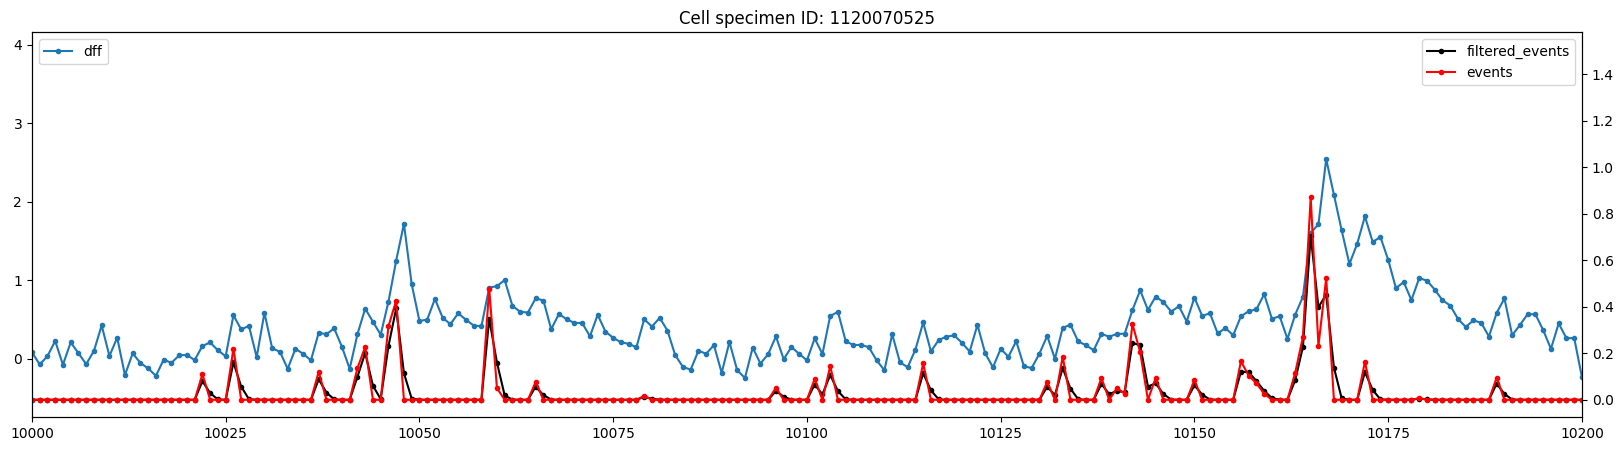

In [5]:
i = 0
start_time = 10000
time_window = 200

fix, ax = plt.subplots(figsize=(20, 5))

ax.plot(test_dev_obj.dff_traces.iloc[i].dff, '.-', label='dff')
cell_specimen_id = test_dev_obj.dff_traces.iloc[i].name
ax2 = ax.twinx()
ax2.plot(test_dev_obj.events.iloc[i].filtered_events, '.-', color='black', label='filtered_events')
ax2.plot(test_dev_obj.events.iloc[i].events, '.-', color='red', label='events')
ax.set_xlim(start_time, start_time+time_window)
ax2.legend(loc='upper right')
ax.legend(loc='upper left')
ax.set_title(f'Cell specimen ID: {cell_specimen_id}')

Text(0.5, 1.0, 'Cell specimen ID: 1120070525')

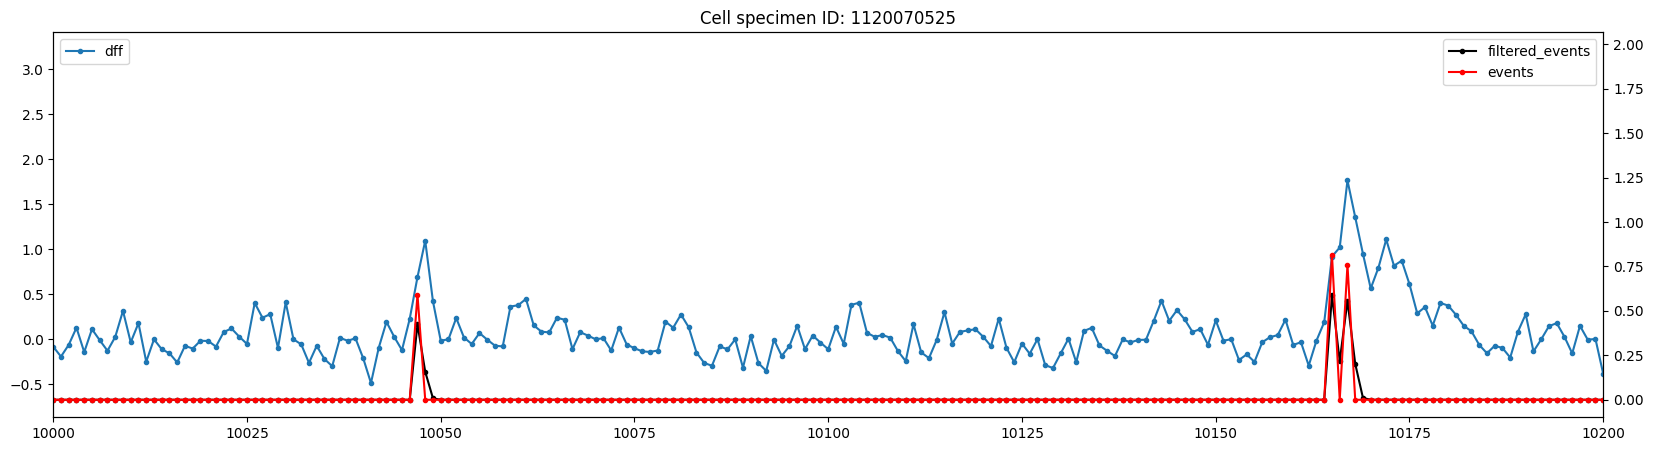

In [6]:
start_time = 10000
time_window = 200

fix, ax = plt.subplots(figsize=(20, 5))

ax.plot(test_dev_obj.inner.dff_traces.loc[cell_specimen_id].dff, '.-', label='dff')
ax2 = ax.twinx()
ax2.plot(test_dev_obj.inner.events.loc[cell_specimen_id].filtered_events, '.-', color='black', label='filtered_events')
ax2.plot(test_dev_obj.inner.events.loc[cell_specimen_id].events, '.-', color='red', label='events')
ax.set_xlim(start_time, start_time+time_window)
ax2.legend(loc='upper right')
ax.legend(loc='upper left')
ax.set_title(f'Cell specimen ID: {cell_specimen_id}')

# Loading experiment group

In [7]:
gh_table = start_gh_analysis()
filters = {'ophys_session_id': [gh_table.ophys_session_id.unique()[0]]}
gh_group = ExperimentGroup(expt_table_to_load=gh_table,  # expt_table_preload might be used for newer version
                             filters=filters,
                             dev=True,
                             test_mode=False,
                             dev_dff_path=GH_DFF_PATH,
                             dev_events_path=GH_EVENTS_PATH,)
gh_group.load_experiments()

Should be on older version of allensdk branch, let MJD know if not


c:\users\jinho.kim\github\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\tables\util\prior_exposure_processing.py:165: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  counts = df.groupby(['mouse_id'])['to'].apply(cumsum)


ophys_session_id [958905696]
Found 8 experiments matching filters


In [8]:
gh_group.experiments.keys()

dict_keys([959389438, 959389431, 959389424, 959389440, 959389434, 959389426, 959389428, 959389436])

## Plot dff and events

In [9]:
test_exp = gh_group.experiments[list(gh_group.experiments.keys())[0]]

Text(0.5, 1.0, 'Cell specimen ID: 1120051073')

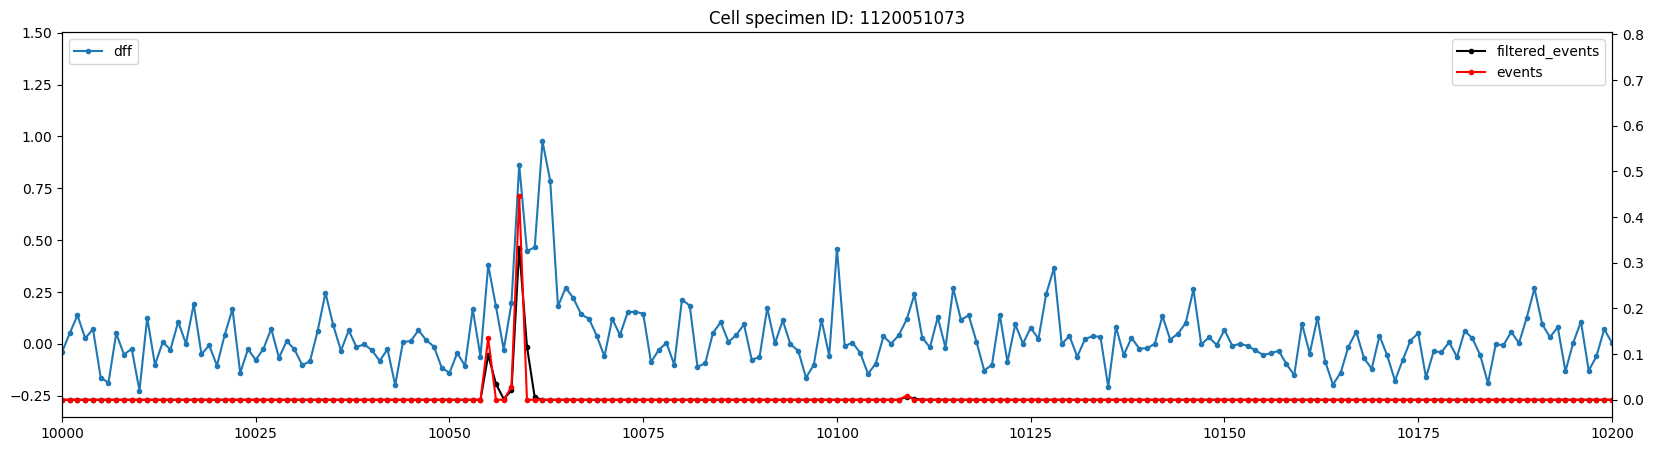

In [10]:
i = 0
start_time = 10000
time_window = 200

fix, ax = plt.subplots(figsize=(20, 5))

ax.plot(test_exp.dff_traces.iloc[i].dff, '.-', label='dff')
cell_specimen_id = test_exp.dff_traces.iloc[i].name
ax2 = ax.twinx()
ax2.plot(test_exp.events.iloc[i].filtered_events, '.-', color='black', label='filtered_events')
ax2.plot(test_exp.events.iloc[i].events, '.-', color='red', label='events')
ax.set_xlim(start_time, start_time+time_window)
ax2.legend(loc='upper right')
ax.legend(loc='upper left')
ax.set_title(f'Cell specimen ID: {cell_specimen_id}')

Text(0.5, 1.0, 'Cell specimen ID: 1120051073 - inner')

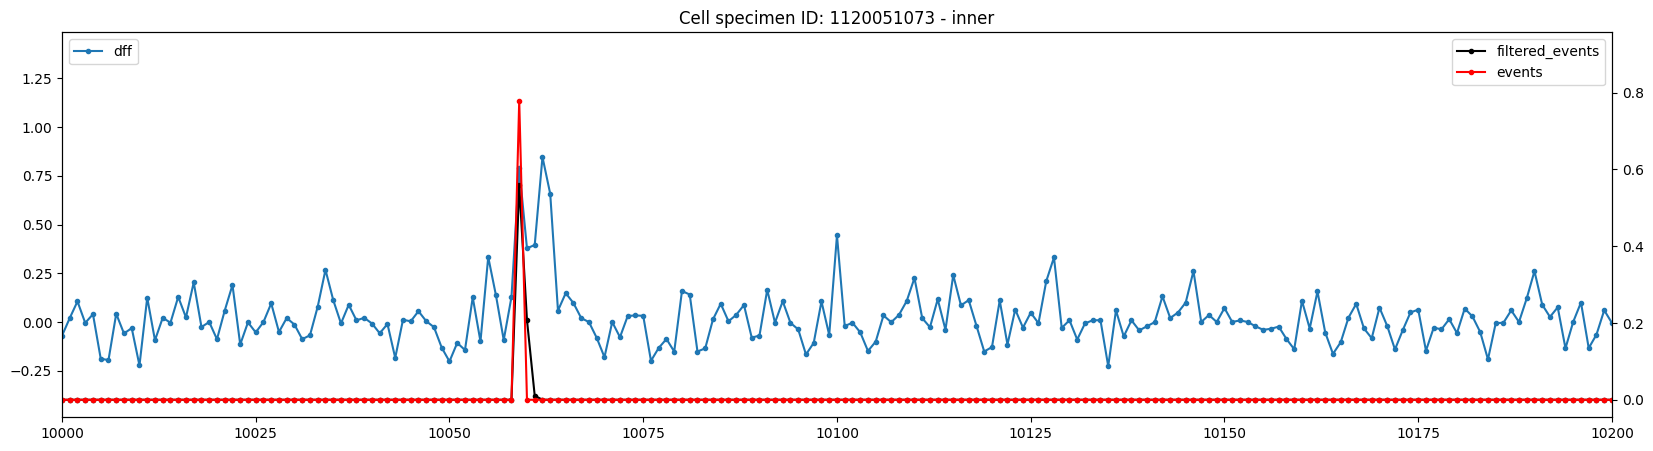

In [11]:

start_time = 10000
time_window = 200

fix, ax = plt.subplots(figsize=(20, 5))

ax.plot(test_exp.inner.dff_traces.loc[cell_specimen_id].dff, '.-', label='dff')
ax2 = ax.twinx()
ax2.plot(test_exp.inner.events.loc[cell_specimen_id].filtered_events, '.-', color='black', label='filtered_events')
ax2.plot(test_exp.inner.events.loc[cell_specimen_id].events, '.-', color='red', label='events')
ax.set_xlim(start_time, start_time+time_window)
ax2.legend(loc='upper right')
ax.legend(loc='upper left')
ax.set_title(f'Cell specimen ID: {cell_specimen_id} - inner')